In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split

C:\Users\spard\DEMO\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
t=pd.read_csv('C://Users//spard//OneDrive//Documents//soham/IRIS.csv', encoding = 'ISO-8859-1')

In [3]:
t

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
t.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
t.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
x=t.iloc[:,:-1]
y=t.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [8]:
corrmatrix=x_train.corr()

<AxesSubplot:>

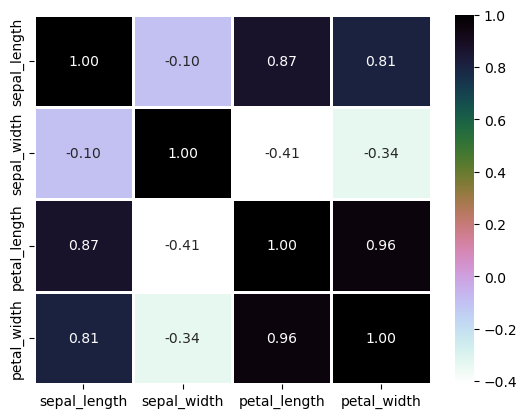

In [9]:
sns.heatmap(corrmatrix,cmap = 'cubehelix_r',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [10]:
model=tree.DecisionTreeClassifier()

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
model.score(x_test,y_test)

0.9333333333333333

In [13]:
y_pred=model.predict(x_test)

In [14]:
new_data=model.predict(np.array([[5.5,2.7,3.5,1.2]]))


C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
new_data

array(['Iris-versicolor'], dtype=object)

In [16]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  2,  9]], dtype=int64)

In [17]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':y_pred})
ap

,actual,predicted
72,Iris-versicolor,Iris-versicolor
112,Iris-virginica,Iris-virginica
132,Iris-virginica,Iris-virginica
88,Iris-versicolor,Iris-versicolor
37,Iris-setosa,Iris-setosa
138,Iris-virginica,Iris-versicolor
87,Iris-versicolor,Iris-versicolor
42,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
90,Iris-versicolor,Iris-versicolor


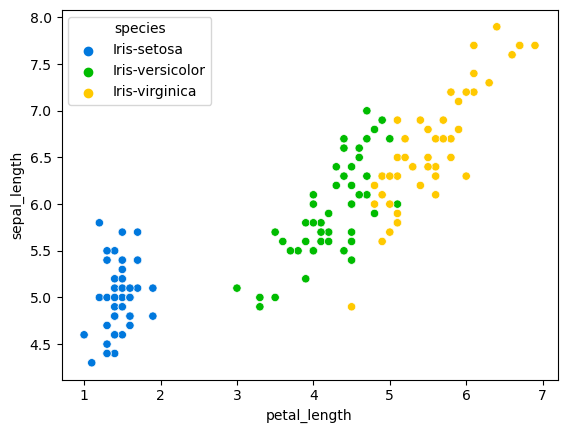

In [18]:
sns.scatterplot(x='petal_length',y='sepal_length',data=t,palette='nipy_spectral',hue='species')
plt.show()

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

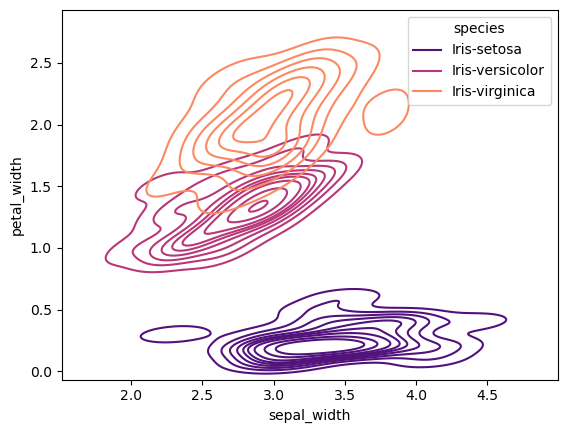

In [19]:
sns.kdeplot(x='sepal_width',y='petal_width',data=t,palette='magma',hue='species')

<AxesSubplot:xlabel='species', ylabel='count'>

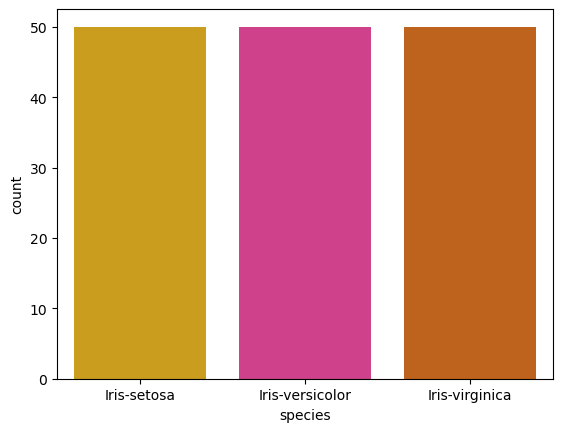

In [20]:
sns.countplot(x="species",data=t,palette='Dark2_r')

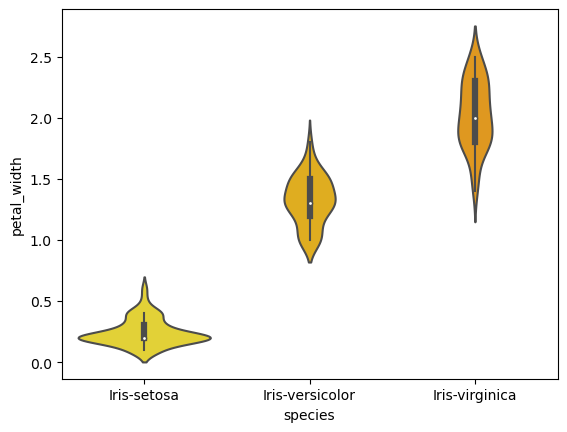

In [21]:
sns.violinplot(x='species',y='petal_width',data=t,palette='Wistia')
plt.show()

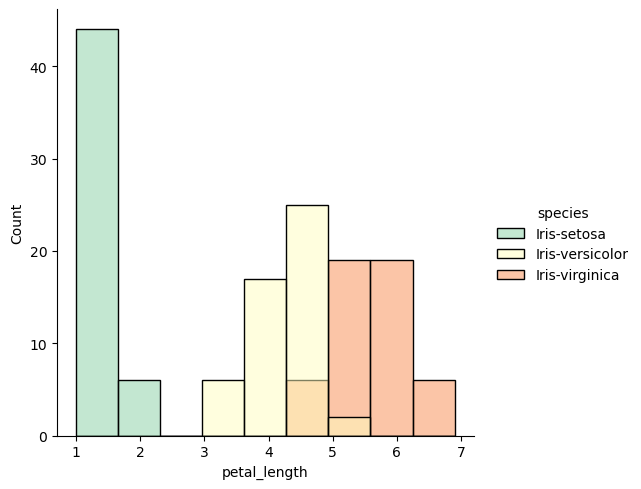

In [22]:
sns.displot(x='petal_length',data=t,palette='Spectral_r',hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Proportion'>

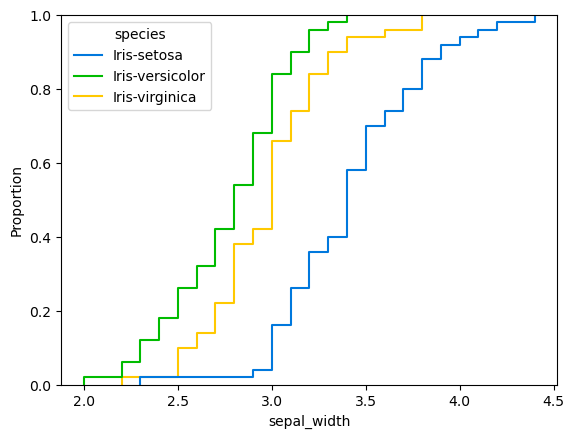

In [23]:
sns.ecdfplot(x='sepal_width',data=t,palette='nipy_spectral',hue='species')

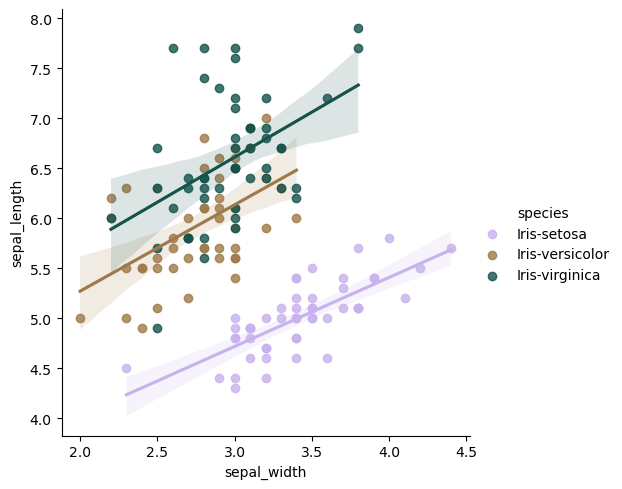

In [24]:
sns.lmplot(x='sepal_width',y='sepal_length',hue='species',data=t,palette='cubehelix_r')

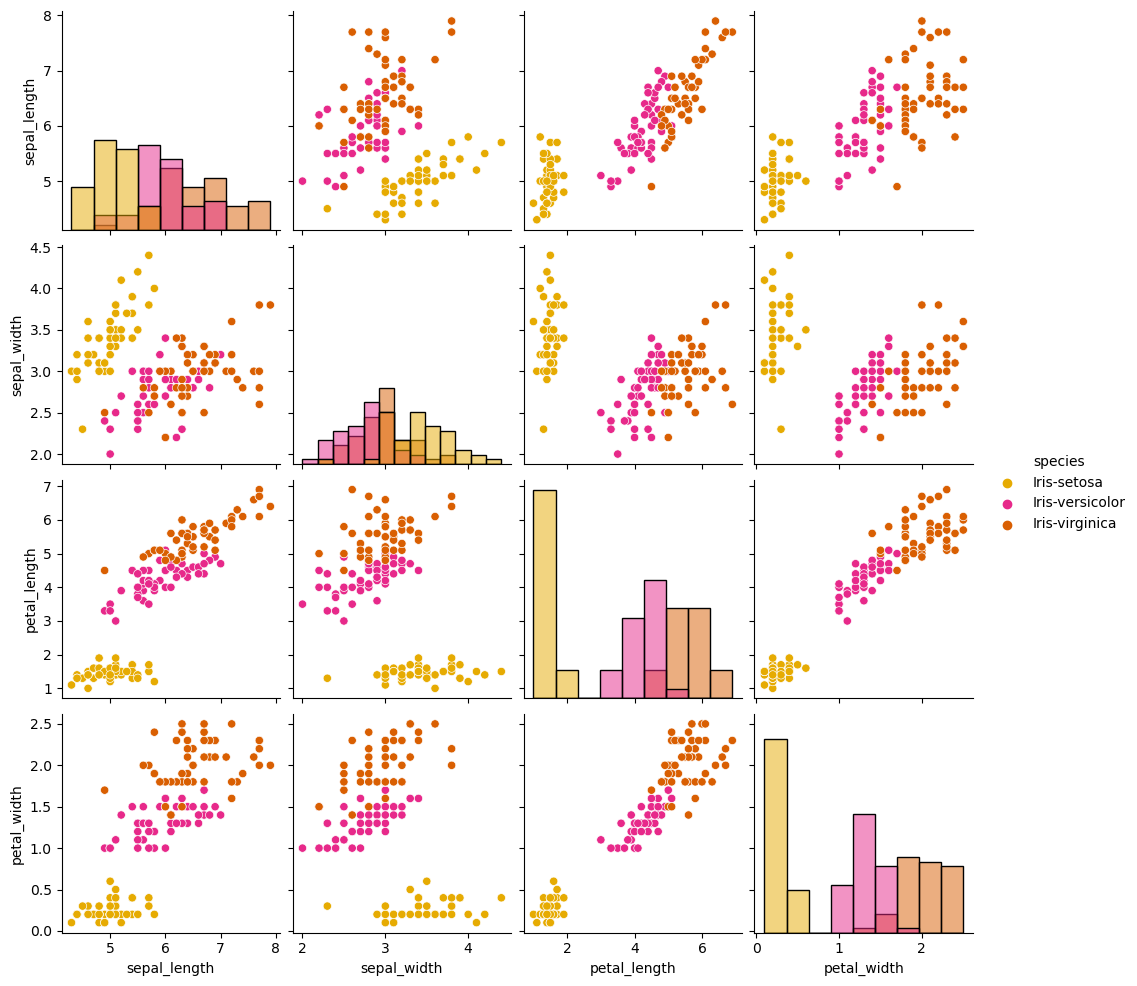

In [25]:
sns.pairplot(data=t,hue='species',diag_kind='hist',palette='Dark2_r')